**Datasets**
The scikit-learn library includes a toy Diabetes dataset of baseline variables for diabetes patients along with a quantitative measure of disease progression one year after baseline.
The UCI Machine Learning Repository includes an Ionosphere dataset of radar returns from the ionosphere collected by an array of high-frequency antennas. The radar returns have been labeled “Good” and “Bad”, based on whether they show evidence of structure in the ionosphere.
**Tasks**
**Regression**
Construct two models for the Diabetes dataset relating body mass index and average blood pressure to the target measure of disease progression one year after baseline. The first model will use linear regression, and the second model will use a simple multi-layer perceptron.

**Applying linear regression**
Split the data into training and testing sets, then construct a linear regression model. Describe the performance of the model on each set. For this model, you may use the scikit-learn library.


**Constructing a multilayer perceptron**
For this task, you must implement each task manually in “vanilla” Python, without third-party machine learning or statistical modules, with the following exceptions:

*   You may use scikit-learn to load and split the dataset
*   You may use Matplotlib to plot a learning curve

Construct a neural network consisting of two hidden layers, each with two neurons each, using sigmoid activation. The network should have a single output layer.
Choose an appropriate loss function, then apply backpropagation manually to find an expression for the gradient of the loss function with respect to each of the weights.
Implement gradient descent to optimize the weights, and plot a learning curve showing the training and test loss as a function of the number of epochs.
Compare the performance of your neural network with the performance of the linear regression model on the training and testing sets.


**Classification**
Construct a dense feed-forward neural network model for the Ionosphere dataset classifying radar returns as“Good” or “Bad” based on the measured attributes.
For this task, you should use either the Keras or PyTorch neural network frameworks. If you are new to machine learning, you may find Keras to be more approachable. If you have experience with machine learning, or if you plan to do a project or thesis involving neural networks, consider using PyTorch instead. You may also use scikit-learn and Matplotlib as described above.


**Constructing a model**
Split the dataset into training and test sets, then train a fully-connected neural network to classify the returns. You will need to determine the size and number of layers, activation functions, optimizer, and other hyperparameters.
Plot learning curves for the training and test sets, and evaluate the performance of the model.

**Tuning the model**
Apply a variety of regularization techniques to improve the performance of your model on the test set. How does the precision and accuracy of the model compare with the Baseline Model Performance for Neural Network Classification shown on the UCI Machine Learning Repository page?



**Platform**
Perform the tasks above and document their results using a notebook on Google Colab with your @csu.fullerton.edu account. If you are not familiar with Google Colab or Jupyter Notebooks, the Welcome To Colaboratory notebook should help you get started. Note, in particular, the section Using Accelerated Hardware.
While you may choose to work locally, especially if you have access to a physical machine with a GPU, your project submission must be uploaded to Google Drive and run successfully in Colab.
Documenting your results
Notebooks allow you to create documents mixing text, equations, code, and visualizations. Your project should make good use of these features. For example:
Identify each task to be performed, documenting any decisions made.
Include both the code to perform each task and its output. Where appropriate, tasks should be broken up into separate blocks, with the results shown for each.
Include written analysis of results along with code output and visualizations.
In short, a reader unfamiliar with the project should be able to read your notebook and understand what you did and what results you obtained.
For help with rendering equations in your notebook, you may wish to consult this LaTeX Equation Cheat Sheet.
At the end of the notebook, assign a percentage contribution to each member of the team. If your team cannot reach an agreement on each member’s level of contribution, describe the tasks that each member performed.


**Construct two models for the Diabetes dataset relating body mass index and average blood pressure to the target measure of disease progression one year after baseline. The first model will use linear regression, and the second model will use a simple multi-layer perceptron.**

1. **Applying linear regression:**
Split the data into training and testing sets, then construct a linear regression model. Describe the performance of the model on each set. For this model, you may use the scikit-learn library.

First we load the Data:


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
X, y = load_diabetes(return_X_y=True, as_frame=True)
print("Shape of data:", X.shape)
print("Shape of target:", y.shape)
display(X.head())

Shape of data: (442, 10)
Shape of target: (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


We split the data into Train and Test. 95% of data will be allocated to Training, and 5% will be used for testing.

In [ ]:
X_bmi_bp = X[["bmi", "bp"]]
X_train, X_test, y_train, y_test = train_test_split(X_bmi_bp, y, random_state=104, test_size=0.05, shuffle=False)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (419, 2)
X_test shape: (23, 2)
y_train shape: (419,)
y_test shape: (23,)


We train the model using the bmi and bp columns. Then we look at R2 value to get an idea of how well the model is fitted

In [ ]:
import sklearn.linear_model
reg = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
display(reg.score(X_train, y_train))
display(reg.coef_)
display(reg.intercept_)

0.3875124891430911

array([779.83605909, 407.19585031])

152.8342658697222

Score of 0.3875125661010911 is not perticularly good but we are using 2 features out of the 10 available features. We also see the coefficient and intercept. Next step is to predict against the test set.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
display(mean_squared_error(y_test, y_pred))
display(r2_score(y_test, y_pred))
display(X_test.head())

2418.739108158907

0.5008282428801697

,bmi,bp
419,-0.054707,-0.053870
420,-0.036385,0.000079
421,0.016428,0.021872
422,0.077863,0.052858
423,-0.039618,0.028758


**After** Testing against the test set, we get an MSE score of 2418 which is fairly large but again we are only using 2 feaures out of 10. We are also seeing an r2 score of 0.5.

**Constructing a multilayer perceptron**
For this task, you must implement each task manually in “vanilla” Python, without third-party machine learning or statistical modules, with the following exceptions:

You may use scikit-learn to load and split the dataset
You may use Matplotlib to plot a learning curve
Construct a neural network consisting of two hidden layers, each with two neurons each, using sigmoid activation. The network should have a single output layer. Choose an appropriate loss function, then apply backpropagation manually to find an expression for the gradient of the loss function with respect to each of the weights. Implement gradient descent to optimize the weights, and plot a learning curve showing the training and test loss as a function of the number of epochs. Compare the performance of your neural network with the performance of the linear regression model on the training and testing sets.

Now we move on to the multilayer perceptron version of this model and see if we can improve on the performance.
We will create test and train set the same as before.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
X, y = load_diabetes(return_X_y=True)
X_bmi_bp = X[:, [2, 3]]
X_train, X_test, y_train, y_test = train_test_split(X_bmi_bp, y, random_state=104, test_size=0.05, shuffle=False)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (419, 2)
X_test shape: (23, 2)
y_train shape: (419,)
y_test shape: (23,)


For this tasks, after lengthy trials of different methods, the best method was to create an expression graph data structure. To create an expression graph and data structure, we followed the guides of Andrej Karpathy:  https://www.youtube.com/watch?v=VMj-3S1tku0

Data structure for neural network:
This class is the mathemathical expression graph for forward prop and backprop. For us to be able to apply the chain rule, we need to be able to know all the values of all the connected functions. This data structure allows us to move up or down the chain and store gradient and other values for each graph node. the value object is essentially similar to Pytorch Tensor object.

Code concept: Each function has a calculation for basic mathemathical operation and also gradient calculation called backward.

Each class property and function is commented for easier undrestanding.

In [ ]:
class Value:
  #The constructor of the class that initializes inital values for our value class.
  #data is the actual value.
  #_children is the set of other values that are connected to this value object.
  #_op is the operation
  def __init__(self, data, _children=(), _op=''):
    self.data = data
    self.gradient = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
  #Special function returns the data value of the value class.
  def __repr__(self):
    return f"Value(data={self.data})"
  #Operator overloading for + fucntion.  We also store the previouse data and operation type.
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other) #if other is is not a value object, we wrap it by value.
    out = Value(self.data + other.data, (self, other), '+')
    #Gradient function stored for back prop call.We also accumulate local gradients.
    def _backward():
      self.gradient += 1.0 * out.gradient
      other.gradient += 1.0 * out.gradient
    out._backward = _backward

    return out

  #Operator overloading for * fucntion. We also store the previouse data and operation type.
  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other) #if other is is not a value object, we wrap it by value.
    out = Value(self.data * other.data, (self, other), '*')
    #Gradient function stored for back prop call. We also accumulate local gradients.
    def _backward():
      self.gradient += other.data * out.gradient
      other.gradient += self.data * out.gradient
    out._backward = _backward

    return out

  #Operator overloading for ** fucntion.  We also store the previouse data and operation type.
  def __pow__(self, other):
    assert isinstance(other, (int, float)) #if other is is not a value object, we wrap it by value.
    out = Value(self.data**other, (self,), f'**{other}')
    #Gradient function stored for back prop call. We also accumulate local gradients.
    def _backward():
        self.gradient += other * (self.data ** (other - 1)) * out.gradient
    out._backward = _backward

    return out
  #Exponent operation for value object.
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    #Gradient function stored for back prop call. We also accumulate local gradients.
    def _backward():
      self.gradient += out.data * out.gradient
    out._backward = _backward

    return out

  #Special function changes order of operation to other * self if self * other doesnt work
  def __rmul__(self, other):
    return self * other
  #Special function changes order of operation to self / other if self / other doesnt work. Note that devision is in form of x * y^-1 for more generalized form.
  def __truediv__(self, other): # self / other
    return self * other**-1
  #Special function implementing negation for cases such as -value(2).
  def __neg__(self): # -self
    return self * -1
  #Special function changes order of operation to self + (-other) if other - self doesnt work.
  def __sub__(self, other): # self - other
    return self + (-other)
  #Special function changes order of operation to other + self if self + other doesnt work.
  def __radd__(self, other): # other + self
    return self + other

  #tanh function for value object.
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    #Gradient function stored for back prop call.
    def _backward():
      self.gradient += (1 - t**2) * out.gradient
    out._backward = _backward

    return out

  #sigmoid function for value object.
  def sigmoid(self):
    x = self.data
    if x >= 0:
      t = 1/(1 + math.exp(-x))
    else:
      t = math.exp(x) /(1 + math.exp(x))
    out = Value(t, (self, ), 'sigmoid')
    #Gradient function stored for back prop call.We also accumulate local gradients.
    def _backward():
      # if x > 0:
      #   self.gradient += ((1 / (1 + math.exp(-x))) * (1-x)) * out.gradient
      # else:
      #   self.gradient += (math.exp(x) / (1 + math.exp(x))) * (1-x) * out.gradient
      self.gradient += ((1/(1 + math.exp(-x)))*(1-x)) * out.gradient
    out._backward = _backward

    return out

  #relu function for value object.
  def relu(self):
    x = self.data
    if x >= 0:
      t = x
    else:
      t = 0
    out = Value(t, (self, ), 'relu')
    #Gradient function stored for back prop call.We also accumulate local gradients.
    def _backward():
      if x > 0:
        self.gradient += 1
      else:
        self.gradient += 0
    out._backward = _backward

    return out

  #Topological sort to make the graph in the backward order for backprop.
  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.gradient = 1
    for node in reversed(topo):
      node._backward()

In [ ]:
import random
import math
class Neuron:
  #The constructor of the class that initializes inital values for our Neuron class.
  #numberOfInputs: Number of inputs to this perticular neuron.
  def __init__(self, numberOfInputs):
    self.w = [Value(random.uniform(-1,1)) for _ in range(numberOfInputs)]
    self.b = Value(random.uniform(-1,1))

  #Special function when the object is called with a parameter x
  #It multiplies the weights and x's and adds them up. Then it applies the chosen actiavtion function and return the result.
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.sigmoid()
    return out

  def parameters(self):
    return self.w + [self.b]

class Layer:
  #The constructor of the class that initializes inital values for our Layer class.
  #numberOfInputs: Number of inputs to each layer and essentially to each (neuron). (this is basically the shape of our inpout data)
  #numberOfOutputs: How many neurons we want in our layer.
  def __init__(self, numberOfInputs, numberOfOutputs):
    self.neurons = [Neuron(numberOfInputs) for _ in range(numberOfOutputs)]

  #Special function when the object is called with a parameter x
  #It utilizes the neuron class. it outputs the neuron's result for each neuron in the layer.
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs #last layer will return single value instead of an list of single element.

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

  #The constructor of the class that initializes inital values for our Layer class.
  #numberOfInputs: Number of inputs to each layer and essentially to each (neuron). (this is basically the shape of our inpout data)
  #numberOfOutputs: list of layers desciribing how many neurons are in each layer.
  def __init__(self, numberOfInputs, numberOfOutputs):
    sz = [numberOfInputs] + numberOfOutputs
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(numberOfOutputs))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

We will train the network using multiple different Learning rates to see which rate results the best resault for us.

In [ ]:
learningRates = [0.0000001, 0.000001 ,0.00001]                # Learning rate
max_epochs = 10                       # Number of Iterations
nn = MLP(2, [2, 2, 1])
mse = 0
TrainingLosses = []
trainX = X_train
trainY = y_train
testX = X_test
testY = y_test
loss = Value(0)
trainingLossLearningRate = []

for l in learningRates:
  for k in range(max_epochs):

    # forward pass
    ypred = [nn(x) for x in trainX]
    loss = sum((yhat - ytruth)**2 for ytruth, yhat in zip(trainY, ypred))
    mse = loss/len(trainY)
    TrainingLosses.append([k, loss.data])

    # backward pass
    for p in nn.parameters():
      p.gradient = 0.0
    loss.backward()

    # update
    for p in nn.parameters():
      p.data += -(l) * p.gradient

  trainingLossLearningRate.append([l, TrainingLosses])
  TrainingLosses = []

We will graph the Loss against EPOCHs for all the learning rates.

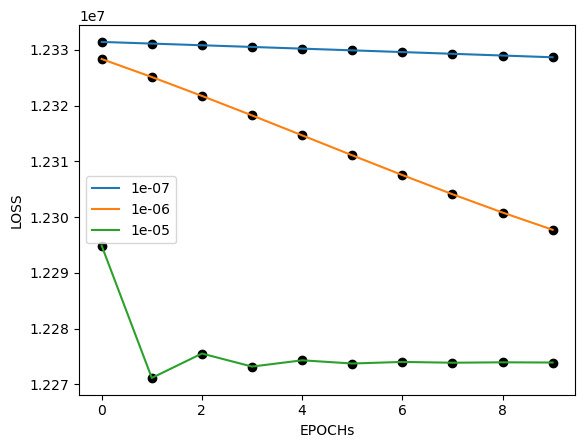

In [ ]:
import matplotlib.pyplot as plt
# Plot outputs
  # plt.scatter([row[0] for row in l] , [row[1] for row in l], color="black")
for i in [(idx , row) for idx, row in trainingLossLearningRate]:
  plt.scatter([row[0] for row in i[1]] , [row[1] for row in i[1]], color="black")
  plt.plot([row[0] for row in i[1]] , [row[1] for row in i[1]], label=i[0])


plt.ylabel("LOSS")
plt.xlabel("EPOCHs")

plt.legend()
plt.show()

Looks like -0.000001 learning rate gives us the best result. we will train the model with more EPOCHs using the picked learning rate.

In [ ]:
learningRate = 0.0000001   # Learning rate
max_epochs = 1000             # Number of Iterations
nn = MLP(2, [2, 2, 1])
mse = 0
TrainingLosses = []
trainX = X_train
trainY = y_train
testX = X_test
testY = y_test
loss = Value(0)


for k in range(max_epochs):

  # forward pass
  ypred = [nn(x) for x in trainX]
  loss = sum((yhat - ytruth)**2 for ytruth, yhat in zip(trainY, ypred))
  mse = loss/len(trainY)
  TrainingLosses.append([k, loss.data])

  # backward pass
  for p in nn.parameters():
    p.gradient = 0.0
  loss.backward()

  # update
  for p in nn.parameters():
    p.data += -(learningRate) * p.gradient


ypred = [nn(x) for x in testX]
testLoss = sum((yhat - ytruth)**2 for ytruth, yhat in zip(testY, ypred))
testMSE = testLoss/len(testY)
print("Test Loss:", testLoss.data)
print("Test MSE:", testMSE.data)

Test Loss: 478913.1874817961
Test MSE: 20822.312499208525


We will graph the model Loss against EPOCH one more time with the new learning rate.

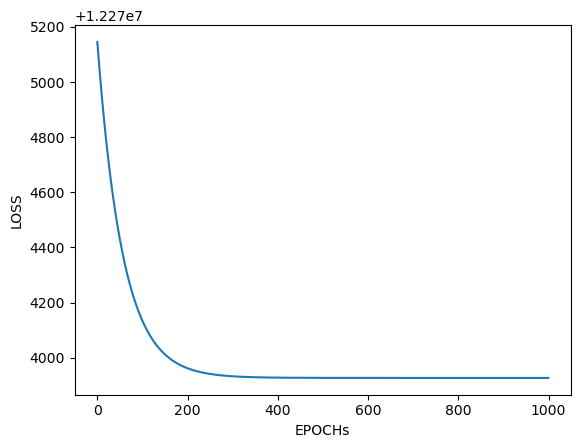

In [ ]:
import matplotlib.pyplot as plt
# Plot outputs
  # plt.scatter([row[0] for row in l] , [row[1] for row in l], color="black")

# plt.scatter([row[0] for row in TrainingLosses] , [row[1] for row in TrainingLosses], color="black")
plt.plot([row[0] for row in TrainingLosses] , [row[1] for row in TrainingLosses])


plt.ylabel("LOSS")
plt.xlabel("EPOCHs")

plt.show()


**Classification**
Construct a dense feed-forward neural network model for the Ionosphere dataset classifying radar returns as“Good” or “Bad” based on the measured attributes.
For this task, you should use either the Keras or PyTorch neural network frameworks. If you are new to machine learning, you may find Keras to be more approachable. If you have experience with machine learning, or if you plan to do a project or thesis involving neural networks, consider using PyTorch instead. You may also use scikit-learn and Matplotlib as described above.


**Constructing a model**
Split the dataset into training and test sets, then train a fully-connected neural network to classify the returns. You will need to determine the size and number of layers, activation functions, optimizer, and other hyperparameters.
Plot learning curves for the training and test sets, and evaluate the performance of the model.

Tuning the model Apply a variety of regularization techniques to improve the performance of your model on the test set. How does the precision and accuracy of the model compare with the Baseline Model Performance for Neural Network Classification shown on the UCI Machine Learning Repository page?

In [ ]:
!pip install ucimlrepo

#Import the dataset
Showing the metadata and variable information for the ionosphere dataset.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

# metadata
print(ionosphere.metadata)

# variable information
print(ionosphere.variables)

{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

Splitting the dataset into training data and testing data.


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

print("X_train:\n", X_train)
print("y_train:\n", y_train)
print("X_test:\n", X_test)
print("y_test:\n", y_test)

X_train:
      Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
202           1           0     0.00000     0.00000     0.00000     0.00000   
177           1           0     0.91667     0.29167     0.83333    -0.16667   
249           1           0     1.00000     0.50000     1.00000     0.25000   
63            1           0     0.63816     1.00000     0.20833    -1.00000   
97            1           0     0.97714     0.19049     0.82683     0.46259   
..          ...         ...         ...         ...         ...         ...   
142           1           0     1.00000    -0.05529     1.00000    -1.00000   
251           1           0     0.87048     0.38027     0.64099     0.69212   
217           1           0     0.92657     0.04174     0.89266     0.15766   
193           1           0     1.00000     0.05149     0.99363     0.10123   
69            1           0     1.00000     1.00000     1.00000    -1.00000   

     Attribute7  Attribute8  Attribute9  

In [ ]:
# Convert 'b' to 0 and 'g' to 1 in y_train and y_test
y_train = y_train.squeeze().map({'b': 0, 'g': 1})
y_test = y_test.squeeze().map({'b': 0, 'g': 1})

#Training a neural network using pytorch

To build a neural network I referred Jeril Kuriakose approach to A Simple Neural Network Classifier using PyTorch: https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2

In [ ]:
!pip install torch

#Processing data

Preprocessing data using PyTorch Dataset and DataLoader. The Dataset stores the sample and their corresponding labels. To make the samples easily accessible, DataLoader wraps the dataset in an iterable manner.

In [ ]:
import torch
from torch.utils.data import Dataset,DataLoader

class Data(Dataset):
    def __init__(self, X_train, y_train):
        # Convert input arrays to tensors and ensure the data types are correct
        # Convert features to float32
        self.X = torch.from_numpy(X_train.to_numpy().astype('float32'))

        # Convert labels to long, assuming they are classification labels
        # If y_train is not already of integer type, ensure it's converted to integers first
        self.y = torch.from_numpy(y_train.to_numpy().astype('int')).type(torch.LongTensor)

        self.len = len(self.X)

    def __getitem__(self, index):
        # Return a single observation and its corresponding label
        return self.X[index], self.y[index]

    def __len__(self):
        # Return the total number of samples
        return self.len

In [ ]:
traindata = Data(X_train, y_train)
testdata = Data(X_test, y_test)

In [ ]:
print(traindata[25])

(tensor([ 1.0000,  0.0000,  0.8669,  0.3595,  0.7201,  0.6667,  0.3720,  0.8305,
         0.0865,  0.8589, -0.2412,  0.8612, -0.5176,  0.6758, -0.6871,  0.4152,
        -0.7702,  0.0990, -0.6940, -0.1365, -0.4949, -0.4221, -0.3254, -0.5768,
        -0.0284, -0.5995,  0.1536, -0.5313,  0.3231, -0.3709,  0.4619, -0.1968,
         0.4096,  0.0182]), tensor(1))


In [ ]:
print(traindata[25:34])

(tensor([[ 1.0000,  0.0000,  0.8669,  0.3595,  0.7201,  0.6667,  0.3720,  0.8305,
          0.0865,  0.8589, -0.2412,  0.8612, -0.5176,  0.6758, -0.6871,  0.4152,
         -0.7702,  0.0990, -0.6940, -0.1365, -0.4949, -0.4221, -0.3254, -0.5768,
         -0.0284, -0.5995,  0.1536, -0.5313,  0.3231, -0.3709,  0.4619, -0.1968,
          0.4096,  0.0182],
        [ 1.0000,  0.0000,  0.8971,  0.3823,  0.9118,  0.3750,  0.7426,  0.6765,
          0.4559,  0.7794,  0.1912,  0.8897, -0.0221,  0.8603, -0.2059,  0.8235,
         -0.3750,  0.6765, -0.5000,  0.4779, -0.7353,  0.3823, -0.8603,  0.0882,
         -0.7426, -0.1250, -0.6793, -0.2413, -0.5515, -0.4265, -0.4412, -0.5074,
         -0.2868, -0.5662],
        [ 1.0000,  0.0000,  0.0833, -0.2069, -1.0000,  1.0000, -1.0000,  1.0000,
          0.7188,  0.4717, -0.8214, -0.6272, -1.0000, -1.0000, -1.0000,  1.0000,
         -0.0275,  0.5915, -0.4211, -0.4211, -0.7463, -1.0000, -1.0000, -0.4680,
         -1.0000,  0.2381,  1.0000, -1.0000, -1.0000

Load the trainingdata using the DataLoader , and set batch_size to 16.

In [ ]:
batch_size = 16
trainloader = DataLoader(traindata, batch_size=batch_size,
                         shuffle=True, num_workers=2)
testloader = DataLoader(testdata, batch_size=batch_size, shuffle=True, num_workers=2)

#Build neural network classifier

In [ ]:
print(X[X.columns[0]].count())

351


In [ ]:
len(X_train)

263

In [ ]:
unique_values = y['Class'].unique()
print(unique_values)

['g' 'b']


The network consists of two linear layers separated by a sigmoid activation function and a dropout layer for regularization. The first linear layer maps the input to the hidden layer, while the second linear layer maps the hidden layer's outputs to the final output. The dropout layer is introduced after the activation function to reduce overfitting by randomly setting a fraction of the input units to 0 at each update during training.

In the forward method, the data flows through the network: it's first passed through linear1, then through the sigmoid function to introduce non-linearity, followed by the dropout layer, and finally through linear2 to produce the output.

In [ ]:
import torch.nn as nn

# number of features (len of X cols)
input_dim = 34
# number of hidden layers
hidden_layers = 25
# number of classes (unique of y)
output_dim = 2

# Define a neural network class that inherits from nn.Module
class Network(nn.Module):
  def __init__(self, dropout_rate=0.5):
    super(Network, self).__init__()
    # Define the first linear layer taking `input_dim` inputs to `hidden_layers` outputs
    self.linear1 = nn.Linear(input_dim, hidden_layers)
    # Define a dropout layer to prevent overfitting, with dropout rate as `dropout_rate`
    self.dropout = nn.Dropout(dropout_rate)
    # Define the second linear layer that maps from the hidden layer to the output
    self.linear2 = nn.Linear(hidden_layers, output_dim)
  def forward(self, x):
    # Apply a sigmoid activation function after the first linear transformation
    x = torch.sigmoid(self.linear1(x))
    # Apply dropout after the activation function
    x = self.dropout(x)
    # Apply the second linear transformation
    x = self.linear2(x)
    return x

Initilize the classifier

In [ ]:
clf = Network()

In [ ]:
print(clf.parameters)

<bound method Module.parameters of Network(
  (linear1): Linear(in_features=34, out_features=25, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear2): Linear(in_features=25, out_features=2, bias=True)
)>


Defining our loss function and the optimizer

Here, we use CrossEntropyLoss, a commonly used loss function for classification problems, especially when the outputs are probability distributions. The optimizer used here is Stochastic Gradient Descent (SGD). The optimizer is responsible for updating the model's weights during the training process. 'clf.parameters()' passes all the trainable parameters of the model to the optimizer, and 'lr=0.1' sets the learning rate to 0.1.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(clf.parameters(), lr=0.1)

Training the neural network classifier

In [ ]:
import matplotlib.pyplot as plt

epochs = 300
training_losses = []
test_losses = []

for epoch in range(epochs):
  running_loss = 0.0
  clf.train()  # Set the model to training mode
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    # print(inputs.shape)
    # set optimizer to zero grad to remove previous epoch gradients
    optimizer.zero_grad()
    # forward propagation
    outputs = clf(inputs)
    loss = criterion(outputs, labels)
    # backward propagation
    loss.backward()
    # optimize
    optimizer.step()
    running_loss += loss.item()
  # Calculate and store the average training loss for the epoch
  avg_train_loss = running_loss / len(trainloader)
  training_losses.append(avg_train_loss)

  # calculate the test loss
  running_test_loss = 0.0
  clf.eval()  # Set the model to evaluation mode
  with torch.no_grad():
      for data in testloader:
          inputs, labels = data
          outputs = clf(inputs)
          loss = criterion(outputs, labels)
          running_test_loss += loss.item()
  avg_test_loss = running_test_loss / len(testloader)
  test_losses.append(avg_test_loss)
  # display statistics

  print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.5f}')

[1,    17] loss: 0.00584
[2,    17] loss: 0.00582
[3,    17] loss: 0.00566
[4,    17] loss: 0.00539
[5,    17] loss: 0.00567
[6,    17] loss: 0.00562
[7,    17] loss: 0.00548
[8,    17] loss: 0.00551
[9,    17] loss: 0.00553
[10,    17] loss: 0.00542
[11,    17] loss: 0.00555
[12,    17] loss: 0.00526
[13,    17] loss: 0.00536
[14,    17] loss: 0.00541
[15,    17] loss: 0.00520
[16,    17] loss: 0.00504
[17,    17] loss: 0.00530
[18,    17] loss: 0.00520
[19,    17] loss: 0.00503
[20,    17] loss: 0.00488
[21,    17] loss: 0.00504
[22,    17] loss: 0.00497
[23,    17] loss: 0.00509
[24,    17] loss: 0.00492
[25,    17] loss: 0.00446
[26,    17] loss: 0.00470
[27,    17] loss: 0.00481
[28,    17] loss: 0.00475
[29,    17] loss: 0.00464
[30,    17] loss: 0.00442
[31,    17] loss: 0.00462
[32,    17] loss: 0.00429
[33,    17] loss: 0.00434
[34,    17] loss: 0.00444
[35,    17] loss: 0.00428
[36,    17] loss: 0.00414
[37,    17] loss: 0.00427
[38,    17] loss: 0.00417
[39,    17] loss: 0.0

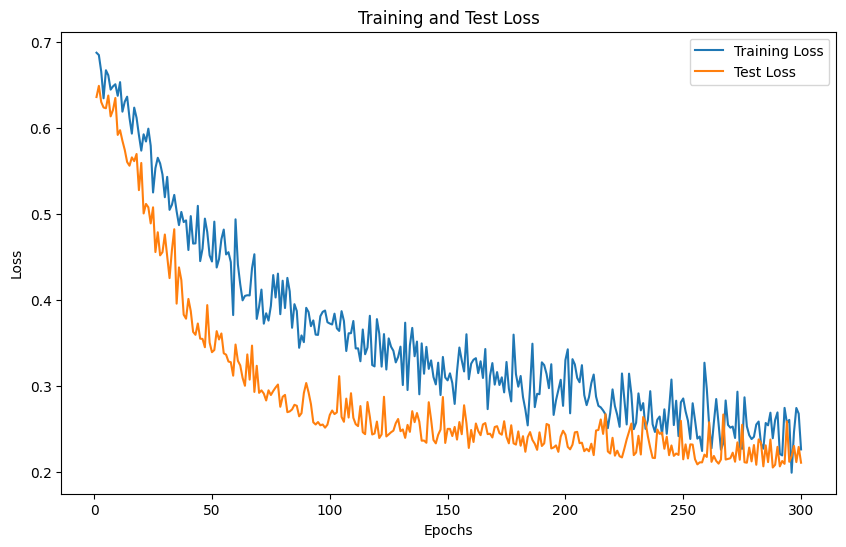

In [ ]:
# Plot the training and test losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), training_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# save the trained model
PATH = './mymodel.pth'
torch.save(clf.state_dict(), PATH)

#Saving the trained model

In [ ]:
clf = Network()
clf.load_state_dict(torch.load(PATH))

<All keys matched successfully>

#Testing the trained model
We are testing the trained model in single mini-batch set to 16

In [ ]:
testdata = Data(X_test, y_test)
testloader = DataLoader(testdata, batch_size=batch_size,
                        shuffle=True, num_workers=2)

In [ ]:
dataiter = iter(testloader)
inputs, labels = next(dataiter)

Test inputs will look like the following

In [ ]:
print(inputs)

tensor([[ 1.0000,  0.0000,  0.4364, -0.1273,  0.5818, -0.1454,  0.1818, -0.6727,
          0.3455, -0.0364,  0.2909, -0.0545,  0.2909,  0.2909,  0.3636, -0.4182,
          0.2000, -0.0182,  0.3636,  0.0545,  0.1273,  0.4909,  0.6182,  0.1636,
          0.3273,  0.1636,  0.4110, -0.0703,  0.3455, -0.0545,  0.1273, -0.3636,
          0.2909, -0.2909],
        [ 1.0000,  0.0000,  0.7485, -0.0281,  0.6568, -0.0518,  0.8062,  0.0281,
          0.8595,  0.0251,  0.6346,  0.0873,  0.7160,  0.0784,  0.7308,  0.0518,
          0.7855, -0.2781,  0.6598, -0.0148,  0.7870,  0.0695,  0.3462, -0.1864,
          0.6539,  0.0281,  0.6101, -0.0664,  0.5355, -0.2115,  0.5902, -0.1405,
          0.5636,  0.0296],
        [ 1.0000,  0.0000,  1.0000,  0.0838,  1.0000,  0.1739,  1.0000, -0.1331,
          0.9817,  0.6452,  1.0000,  0.4790,  1.0000,  0.5911,  1.0000,  0.7076,
          1.0000,  0.8278,  1.0000,  0.9510,  1.0000,  1.0000,  0.9804,  1.0000,
          0.9162,  1.0000,  0.8390,  1.0000,  0.7482,

In [ ]:
#test labels
print(labels)

tensor([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])


In [ ]:
outputs = clf(inputs)
__, predicted = torch.max(outputs, 1)
print(predicted)

tensor([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])


#Calculate Accuracy

In [ ]:
correct, total = 0, 0
# no need to calculate gradients during inference
with torch.no_grad():
  for data in testloader:
    inputs, labels = data
    # calculate output by running through the network
    outputs = clf(inputs)
    # get the predictions
    __, predicted = torch.max(outputs.data, 1)
    # update results
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the {len(testdata)} test data: {100 * correct // total} %')

Accuracy of the network on the 88 test data: 94 %


### The overall accuracy of the network that we got is 94% which we are pretty happy with. Compared to UCI Ionosphere Dataset, our designed neural network model beat or matched all the other baseline models performance. The baseline neural network classification accuracy was an average of only 87.5% and logistic regression was even lower at 79.5% accuracy.

##CONCLUSION & DOCUMENTING THE RESULTS
## APPLYING LINEAR REGRESSION
The MSE and r2 values for applying linear regression on the BMI and BP sections only of the scikit Diabetes database are shown below. After Testing against the test set, we get an MSE score of 2418 which is fairly large but again we are only using 2 feaures out of 10. We are also seeing an r2 score of 0.5.

## CONSTRUCTIOING A MULTILAYER PERCEPTRON
The MSE and loss values for constructing our own multilayer perceptron on the on the BMI and BP sections only of the scikit Diabetes database are shown below.After Testing against the test set, we get an MSE score of 20822 which is fairly large but again we are only using 2 feaures out of 10 on a self-designed network. We are also seeing a test loss of 478913.

## CLASSIFICATION, CONSTRUCTING A MODEL, AND TUNING A MODEL
After building the network out and setting aside some testing data, 88 samples to test on to be exact, the overall accuracy for the neural network model we designed for the UCI Ionosphere data set is 94%.
